#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [17]:
model = Sequential()

In [18]:
#卷積層1

In [19]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [20]:
model.add(Dropout(rate=0.25))

In [21]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
#卷積層2與池化層2

In [23]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [24]:
model.add(Dropout(0.25))

In [25]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [27]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [28]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [29]:
model.add(Dense(10, activation='softmax'))

In [30]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [31]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [36]:
from keras import losses
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [38]:
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.3,
                        epochs=8, batch_size=32, verbose=1)

Train on 35000 samples, validate on 15000 samples
Epoch 1/8
35000/35000 [==============================] - 208s 6ms/step - loss: 0.1932 - acc: 0.9241 - val_loss: 0.2015 - val_acc: 0.9199
Epoch 2/8
35000/35000 [==============================] - 212s 6ms/step - loss: 0.1910 - acc: 0.9248 - val_loss: 0.2001 - val_acc: 0.9204
Epoch 3/8
35000/35000 [==============================] - 210s 6ms/step - loss: 0.1897 - acc: 0.9256 - val_loss: 0.1984 - val_acc: 0.9217
Epoch 4/8
35000/35000 [==============================] - 208s 6ms/step - loss: 0.1878 - acc: 0.9264 - val_loss: 0.1981 - val_acc: 0.9218
Epoch 5/8
35000/35000 [==============================] - 210s 6ms/step - loss: 0.1869 - acc: 0.9269 - val_loss: 0.1959 - val_acc: 0.9225
Epoch 6/8
35000/35000 [==============================] - 708s 20ms/step - loss: 0.1855 - acc: 0.9274 - val_loss: 0.1949 - val_acc: 0.9228
Epoch 7/8
35000/35000 [==============================] - 211s 6ms/step - loss: 0.1845 - acc: 0.9274 - val_loss: 0.1947 - val_ac

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

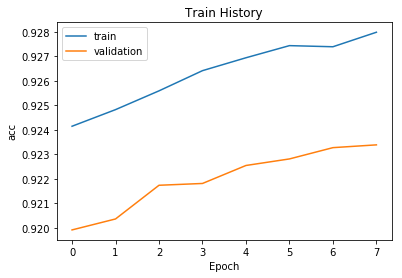

In [40]:
show_train_history(train_history,'acc','val_acc')

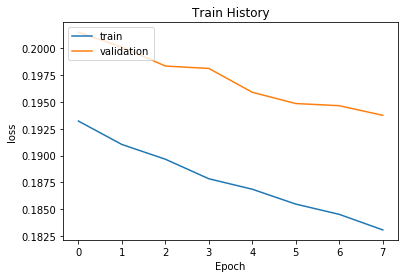

In [41]:
show_train_history(train_history,'loss','val_loss')

In [43]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.3,
                        epochs=8, batch_size=32, verbose=1)

Train on 35000 samples, validate on 15000 samples
Epoch 1/8
35000/35000 [==============================] - 209s 6ms/step - loss: 0.0534 - acc: 0.5973 - val_loss: 0.0561 - val_acc: 0.5986
Epoch 2/8
35000/35000 [==============================] - 206s 6ms/step - loss: 0.0531 - acc: 0.5981 - val_loss: 0.0559 - val_acc: 0.6048
Epoch 3/8
35000/35000 [==============================] - 208s 6ms/step - loss: 0.0529 - acc: 0.6009 - val_loss: 0.0558 - val_acc: 0.6043
Epoch 4/8
35000/35000 [==============================] - 204s 6ms/step - loss: 0.0528 - acc: 0.6003 - val_loss: 0.0557 - val_acc: 0.6040- loss: 0.0527 - 
Epoch 5/8
35000/35000 [==============================] - 225s 6ms/step - loss: 0.0528 - acc: 0.6009 - val_loss: 0.0555 - val_acc: 0.6079
Epoch 6/8
35000/35000 [==============================] - 219s 6ms/step - loss: 0.0525 - acc: 0.6029 - val_loss: 0.0554 - val_acc: 0.6062
Epoch 7/8
35000/35000 [==============================] - 213s 6ms/step - loss: 0.0527 - acc: 0.6020 - val_loss:

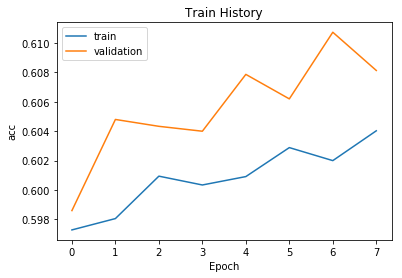

In [44]:
show_train_history(train_history,'acc','val_acc')

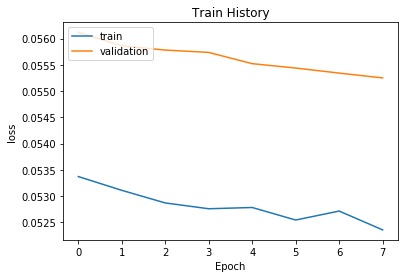

In [45]:
show_train_history(train_history,'loss','val_loss')